In [4]:
import os
import numpy as np
import matplotlib as mpl
mpl.use("pgf")

import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format='retina'

In [5]:
lw = 1
save = 1

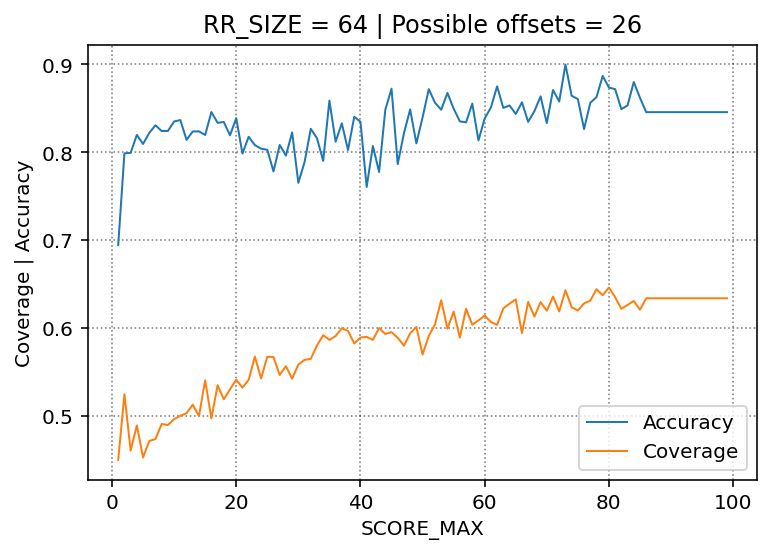

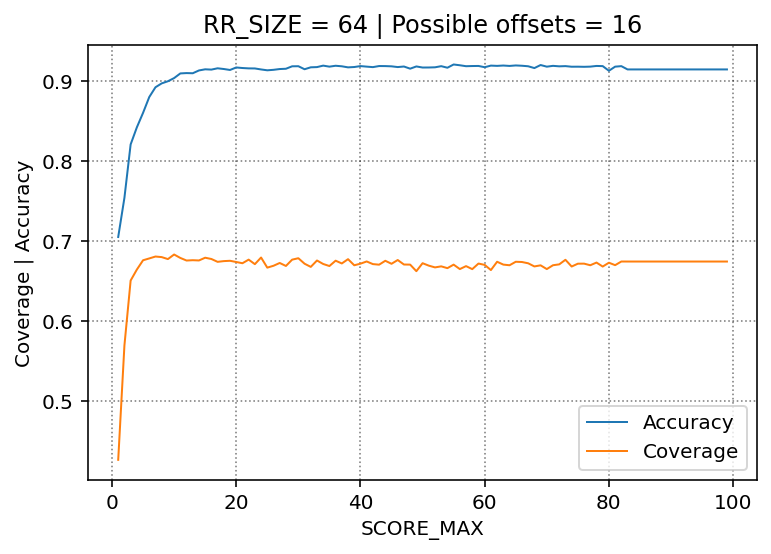

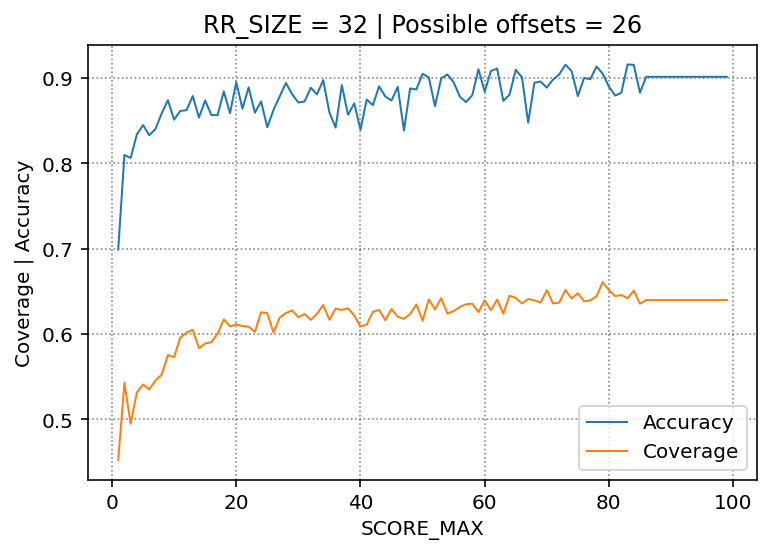

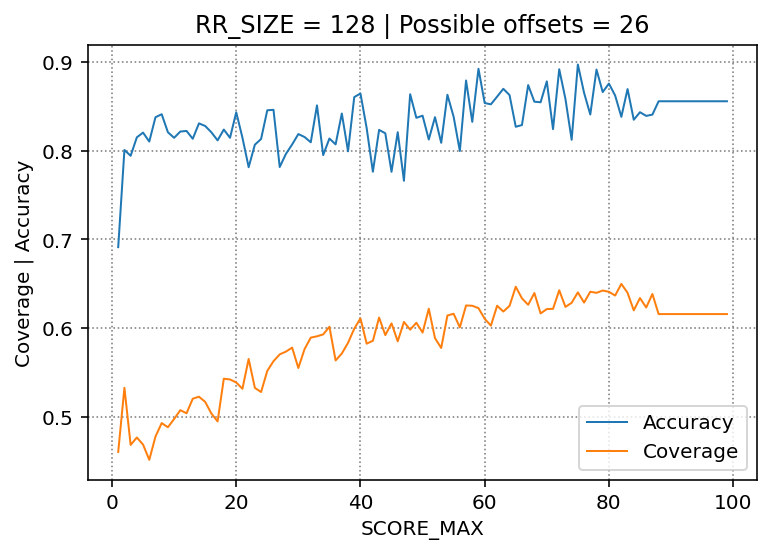

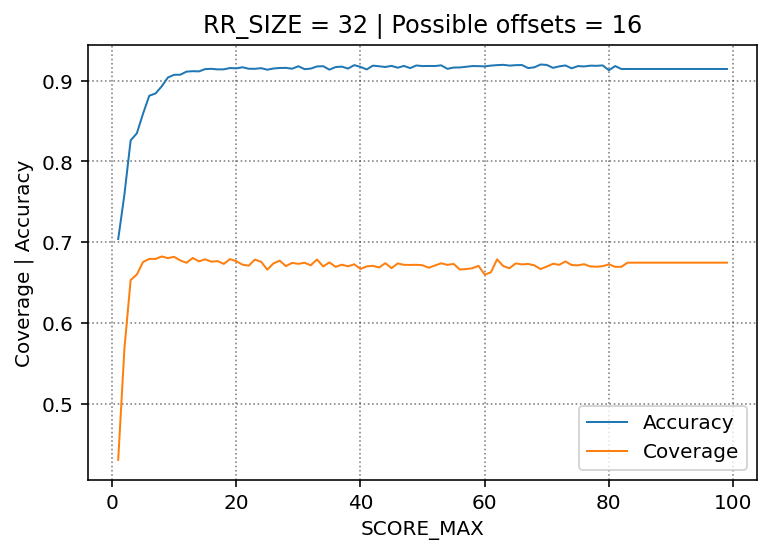

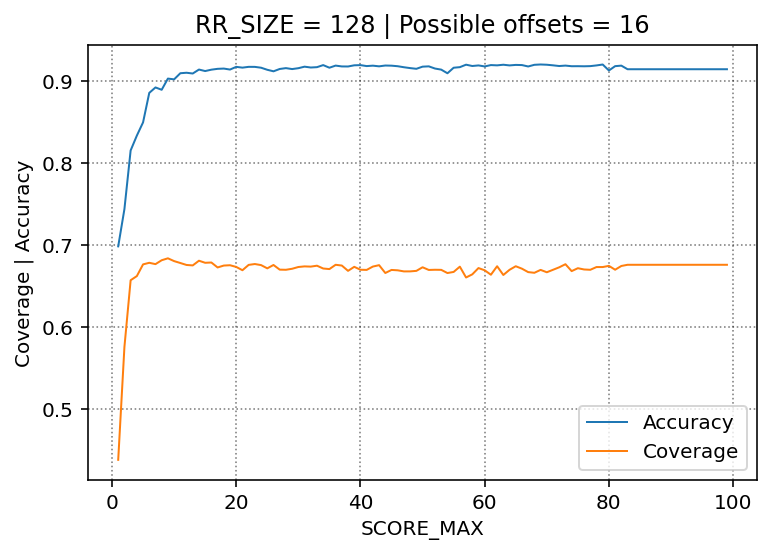

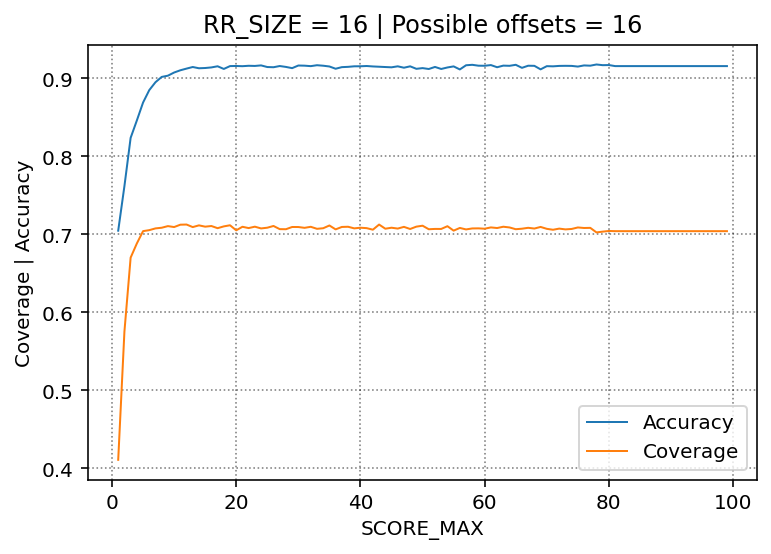

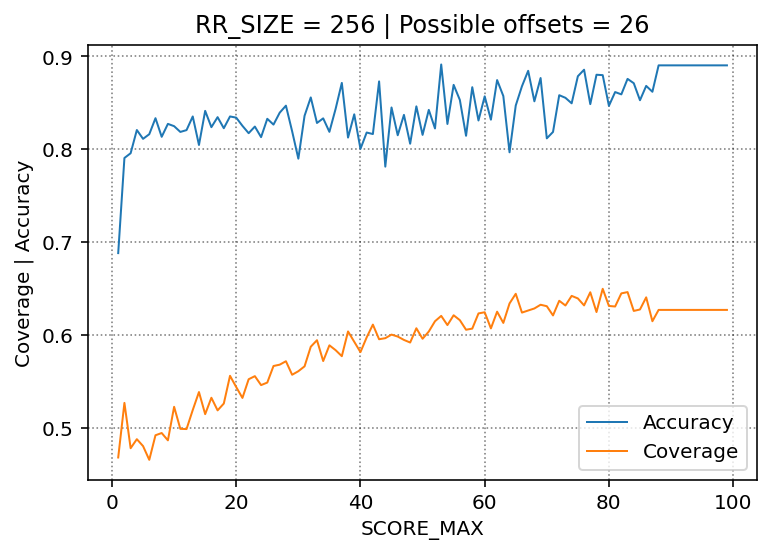

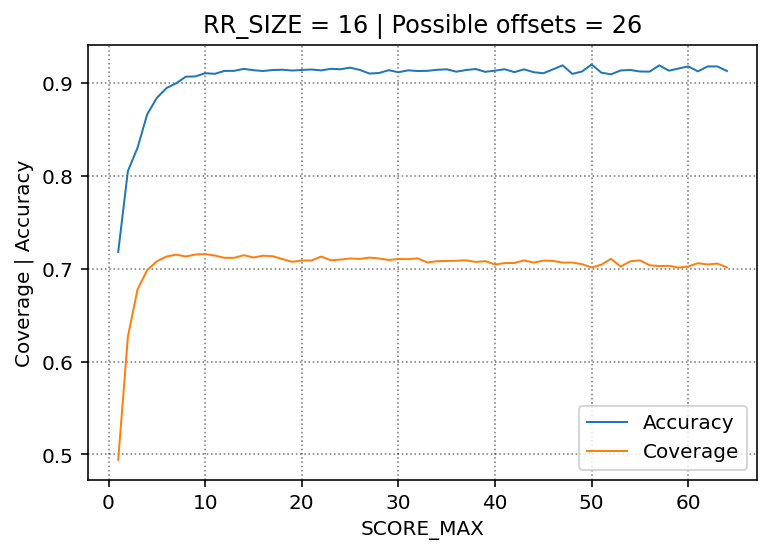

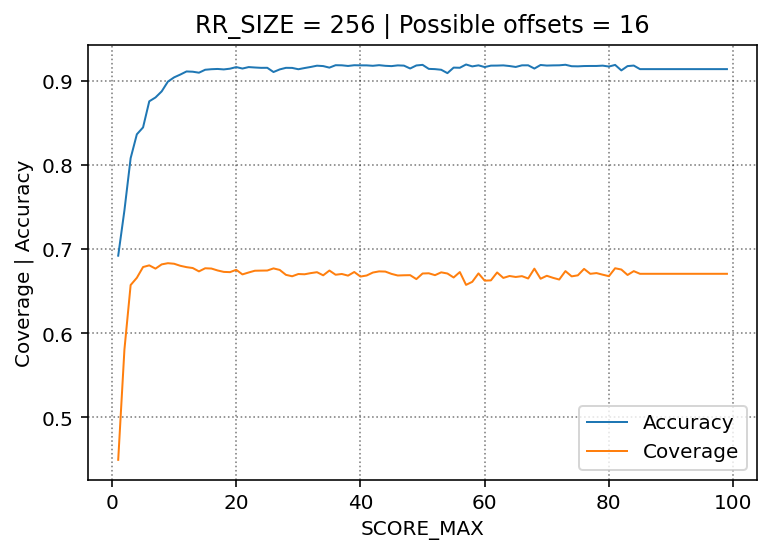

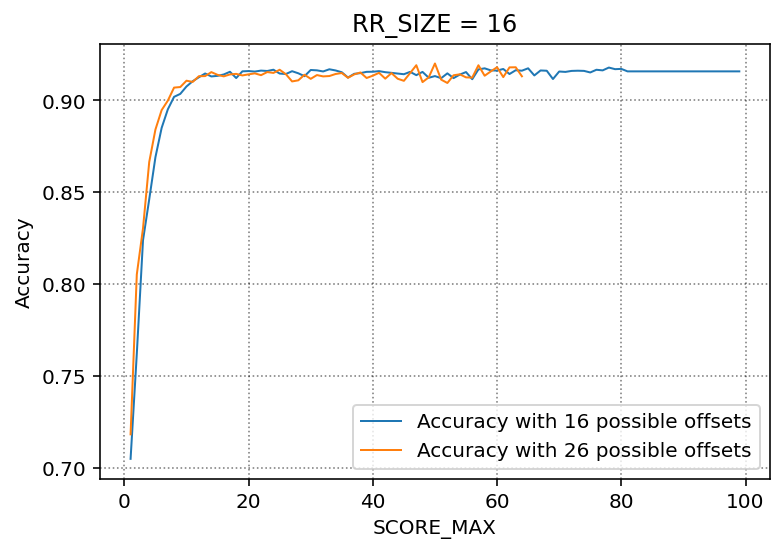

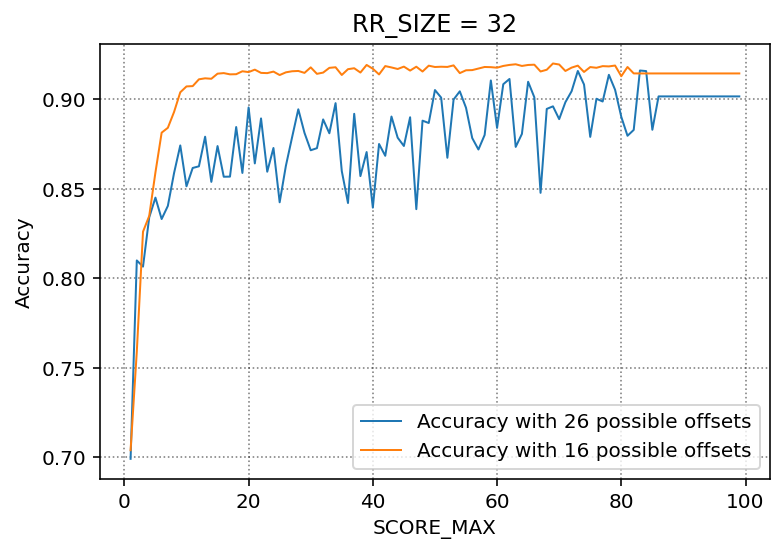

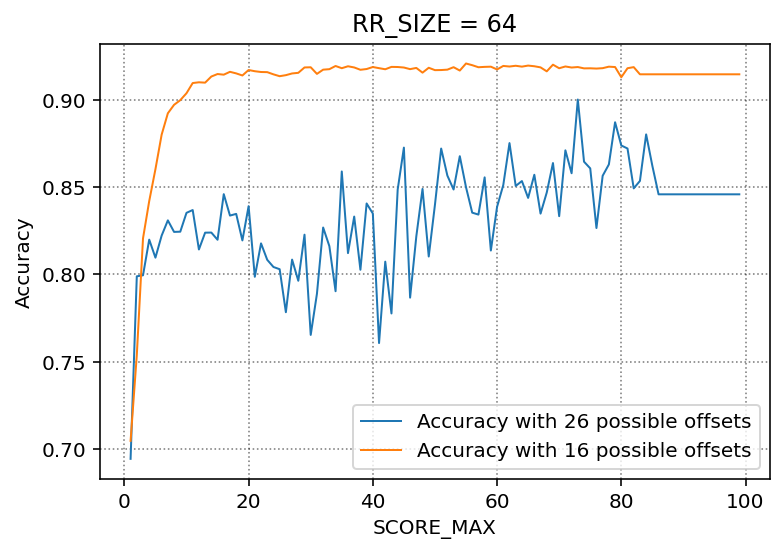

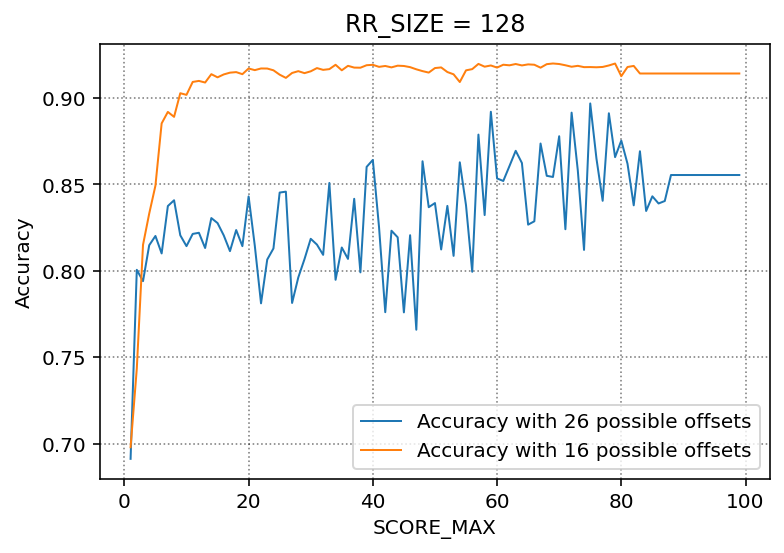

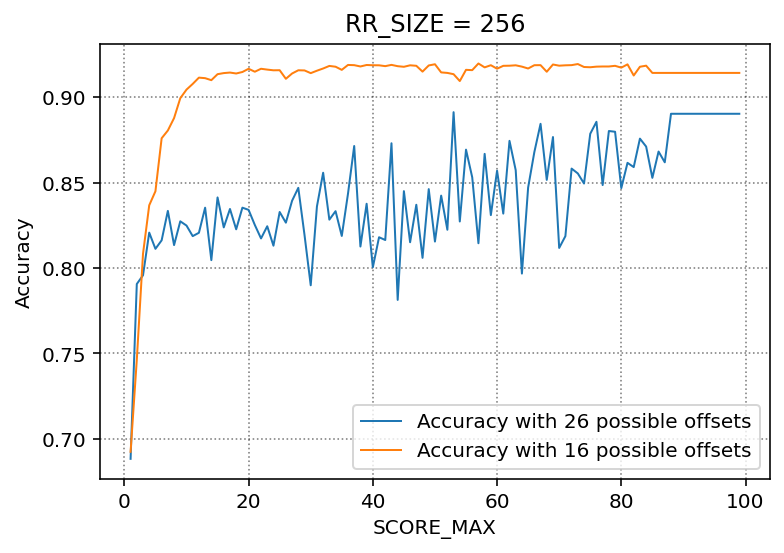

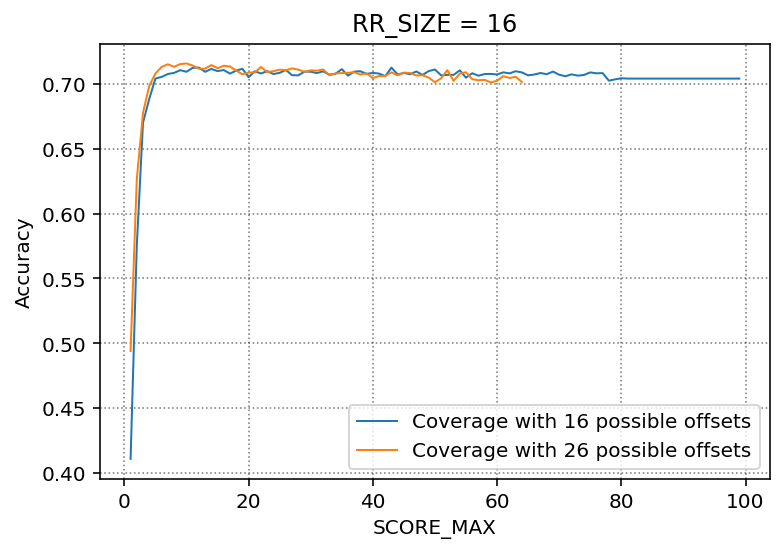

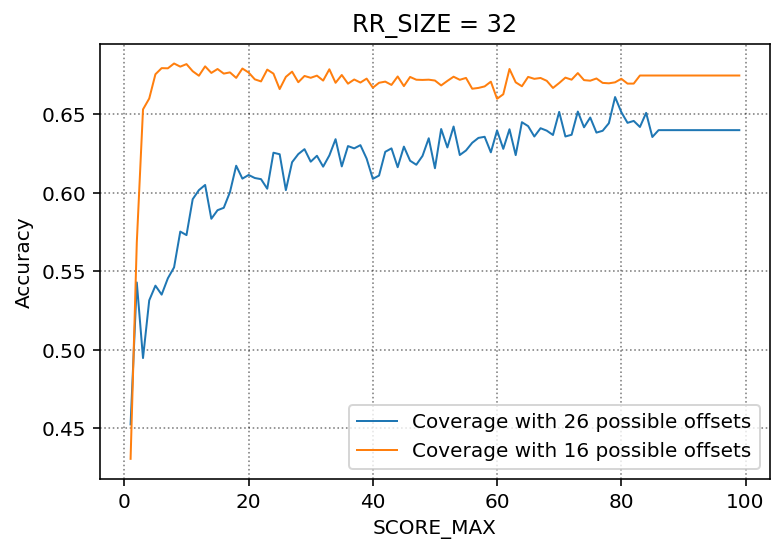

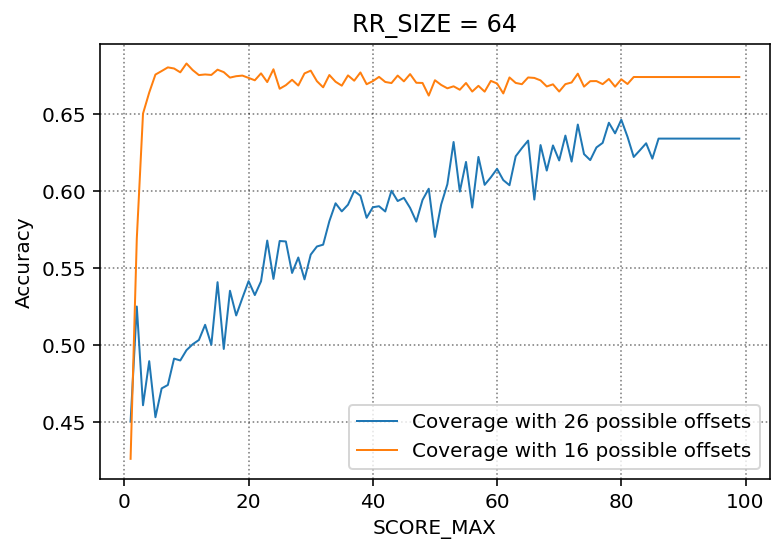

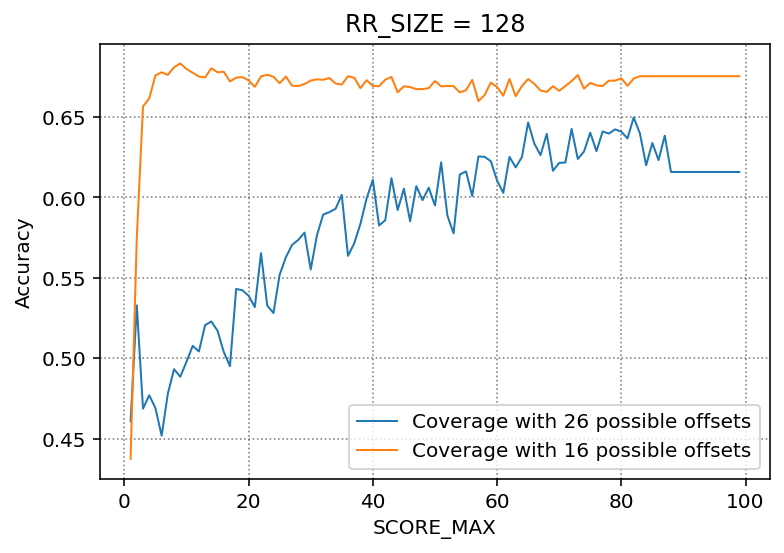

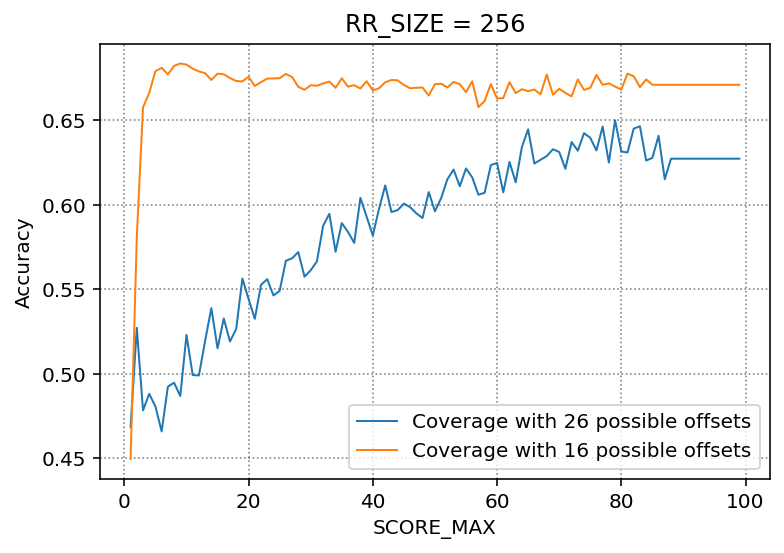

Best product: 0.65408147232
Best scoremax: 14
Best folder: RR16offsets26


In [6]:
dir = 'Data'

all_accuracy = []
all_coverage = []
all_scoremax = []
foldername = []

for folder in os.scandir(dir):
    folder_str = folder.name
    foldername.append(folder_str)
    rr_size = folder_str[2:-9]
    num_offsets = folder_str[-2:]
    if int(folder_str[2:-9]) > 100:
        offset = 20
    else:
        offset = 19
    num_files = (len([name for name in os.listdir(folder) if os.path.isfile(os.path.join(folder, name))]))
    accuracy = [None] * num_files
    coverage = [None] * num_files
    scoremax = [i+1 for i in range(num_files)]

    for entry in os.scandir(folder):
        entry_str = entry.name
        with open(entry) as f:
            content = f.readlines()
            accuracy[int(entry_str[offset:-17])-1] = float(content[21][-8:])
            coverage[int(entry_str[offset:-17])-1] = float(content[22][-8:])

    all_accuracy.append(accuracy)
    all_coverage.append(coverage)
    all_scoremax.append(scoremax)

    fig, ax = plt.subplots()


    ax.plot(scoremax, accuracy, label = 'Accuracy', linewidth = lw)
    ax.plot(scoremax, coverage, label = 'Coverage', linewidth = lw)

    ax.legend(loc = 'lower right')
    ax.set_xlabel('SCORE_MAX')
    ax.set_ylabel('Coverage | Accuracy')

    title = f'RR_SIZE = {rr_size} | Possible offsets = {num_offsets}'
    ax.set_title(title)

    plt.grid(ls = ':', color = 'black', alpha = 0.5)
    plt.show()

    if save:
        fig.savefig(f'Plot_pgf/RR={rr_size}_offsets={num_offsets}.pgf', format = 'pgf')
        fig.savefig(f'Plot/RR={rr_size}_offsets={num_offsets}.jpg')


RR = 16
while RR < 512:
        
    fig, ax = plt.subplots()

    for idx, value in enumerate(foldername):
        if value[2:-9] == str(RR):
            num_offsets = value[-2:]
            ax.plot(all_scoremax[idx], all_accuracy[idx], label = f'Accuracy with {num_offsets} possible offsets', linewidth = lw)


    ax.legend(loc = 'lower right')
    ax.set_xlabel('SCORE_MAX')
    ax.set_ylabel('Accuracy')
    title = f'RR_SIZE = {RR}'
    ax.set_title(title)
    plt.grid(ls = ':', color = 'black', alpha = 0.5)
    plt.show()

    if save:
        fig.savefig(f'Plot_pgf/RR={RR}_Accuracy.pgf', format = 'pgf')
        fig.savefig(f'Plot/RR={RR}_Accuracy.jpg')

    RR *= 2

RR = 16
while RR < 512:
        
    fig, ax = plt.subplots()

    for idx, value in enumerate(foldername):
        if value[2:-9] == str(RR):
            num_offsets = value[-2:]
            ax.plot(all_scoremax[idx], all_coverage[idx], label = f'Coverage with {num_offsets} possible offsets', linewidth = lw)


    ax.legend(loc = 'lower right')
    ax.set_xlabel('SCORE_MAX')
    ax.set_ylabel('Accuracy')
    title = f'RR_SIZE = {RR}'
    ax.set_title(title)
    plt.grid(ls = ':', color = 'black', alpha = 0.5)
    plt.show()

    if save:
        fig.savefig(f'Plot_pgf/RR={RR}_Coverage.pgf', format = 'pgf')
        fig.savefig(f'Plot/RR={RR}_Coverage.jpg')

    RR *= 2

best_product = 0
best_scoremax = 0
best_folder = ''

for idx, value in enumerate(foldername):
    for idx2, value2 in enumerate(all_scoremax[idx]):
        product = all_accuracy[idx][idx2] * all_coverage[idx][idx2]
        if product > best_product:
            best_product = product
            best_scoremax = value2
            best_folder = value

print(f'Best product: {best_product}')
print(f'Best scoremax: {best_scoremax}')
print(f'Best folder: {best_folder}')
